# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [199]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [124]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

Сначала реализуем функцию генерации случайных величин из равномерного распределения на отрезке $[0,1]$ с заданной точностью:

In [125]:
def uniform(size : [int, tuple] = 1, precision=30):
    if isinstance(size, tuple):
        return (coin(np.prod(size) * precision).reshape(size + (precision,)) * np.power(2, np.linspace(precision - 1, 0, precision))).sum(axis=-1) / np.power(2, precision)
    else:
        return (coin(np.prod(size) * precision).reshape((size,) + (precision,)) * np.power(2, np.linspace(precision - 1, 0, precision))).sum(axis=-1) / np.power(2, precision)

Визуализируем выборку из 200 случайных величин, которую мы получим при помощи функции выше:

In [137]:
def plot_uniform_density(size=200):
    random_values = uniform(size, 6)
    y_values = np.zeros(200)
    grid = np.linspace(-0.25, 1.25, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек

    plt.figure(figsize=(15, 12))

    plt.scatter(random_values, y_values, alpha=0.4)
    plt.hist(random_values, bins=10, alpha=0.4, density=True, label='Гистограмма случайной величины')
    plt.plot(grid, uniform_pdf(grid), color='red', lw=5, label='Плотность случайной величины')

    plt.title("Случайная величина S~U(0, 1)", fontsize=21)
    plt.legend(fontsize=14)
    plt.ylim((-0.2, 2))

    return plt.gcf()

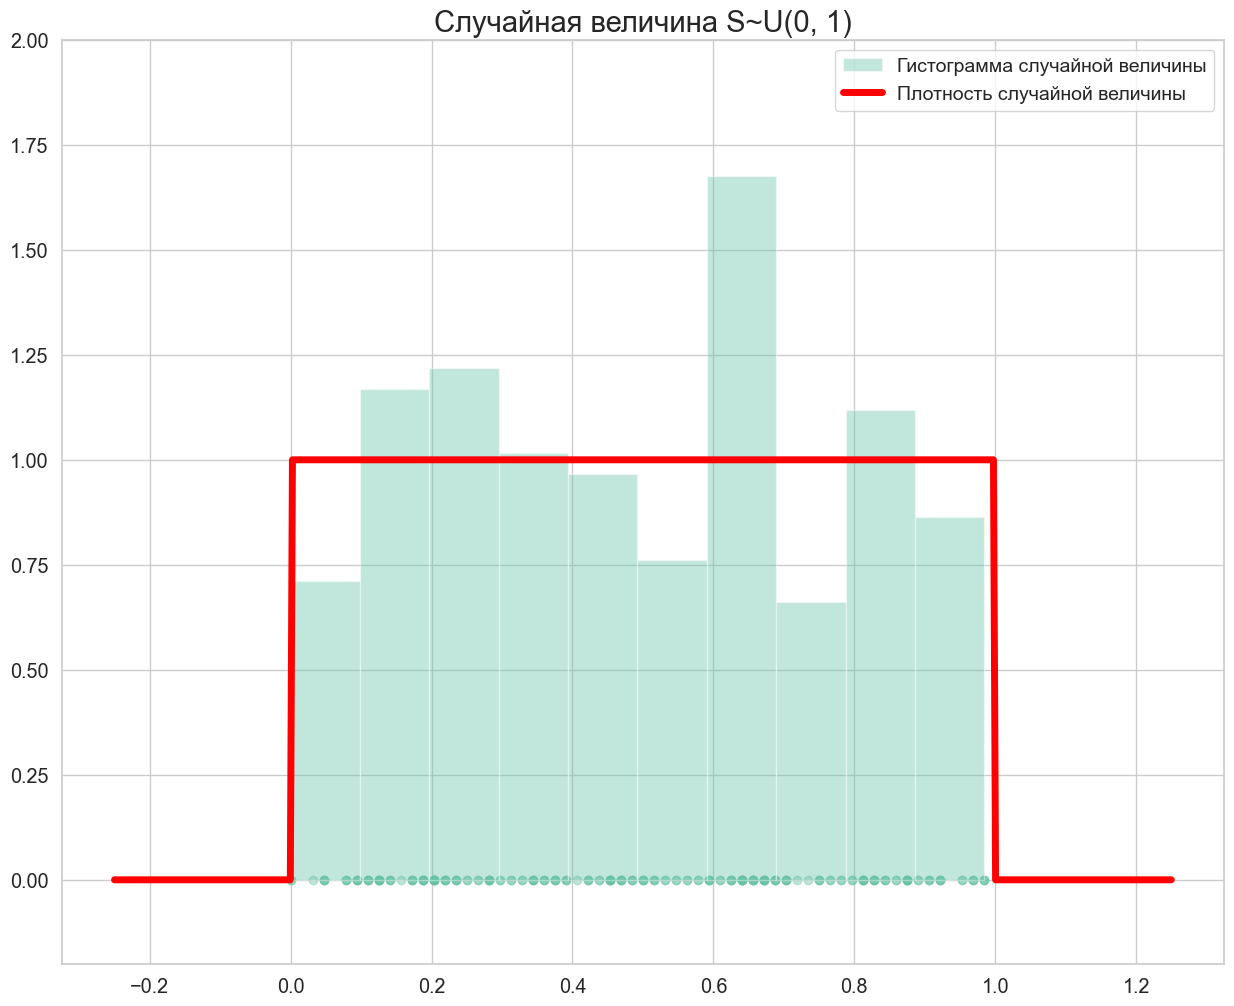

In [138]:
image = plot_uniform_density()

А также исследуем, как меняются значения случайных величин в зависимости от $precision$:

In [ ]:
def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    plt.suptitle("Зависимость значений выборки от точности", fontsize=15)

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        ax = plt.subplot(3, 2, i + 1)
        ax.title.set_text("prec = {val}".format(val=precision))

        plt.scatter(
            uniform(100, precision),
            np.zeros(100),
            alpha=0.4
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    return plt.gcf()

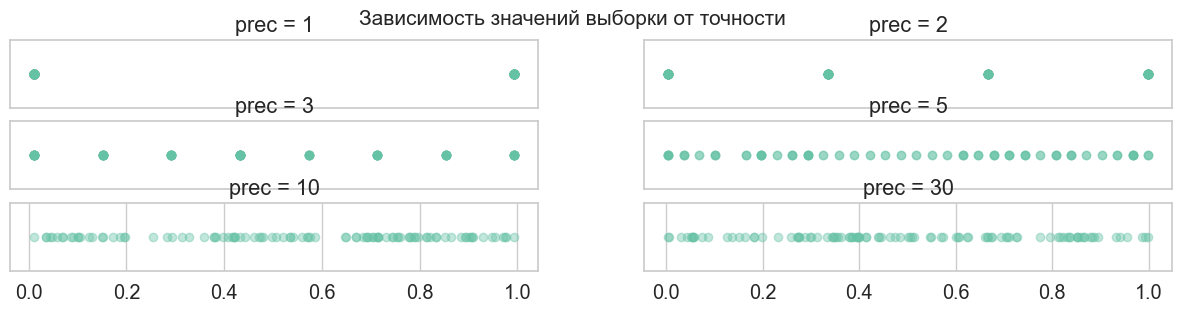

In [129]:
image = plot_uniform_different_precision()

Напишем функцию normal генерации случайных величин в количестве $size$ штук из распределения
$N(loc, scale^2)$ с помощью преобразования Бокса-Мюллера.

In [130]:
def normal(size : [int, tuple] = 1, loc=0, scale=1, precision=30):
    psi1 = np.cos(uniform(size, precision) * 2 * np.pi)
    psi2 = np.sqrt(np.log(uniform(size, precision)) * (-2))
    random_values_0_1 = psi1 * psi2

    return loc + scale * random_values_0_1

Визуализируем выборку из 200 случайных величин, которую мы получим при помощи функции выше:

In [133]:
def plot_normal_density(size=200):
    np.seterr(divide = 'ignore')

    random_values = normal(size, 0, 1, 10)
    y_values = np.zeros(size)
    grid = np.linspace(-3, 3, 1000)

    plt.figure(figsize=(15, 12))

    plt.scatter(random_values, y_values, alpha=0.4)
    plt.hist(np.ma.masked_invalid(random_values), bins=20, alpha=0.4, density=True, label='Гистограмма выборки')
    plt.plot(grid, norm_pdf(grid), color='red', lw=5, label='Плотность случайной величины')

    plt.title("Случайная величина S~N(0, 1)", fontsize=21)
    plt.legend(fontsize=14)
    plt.ylim((-0.05, 0.75))

    return plt.gcf()

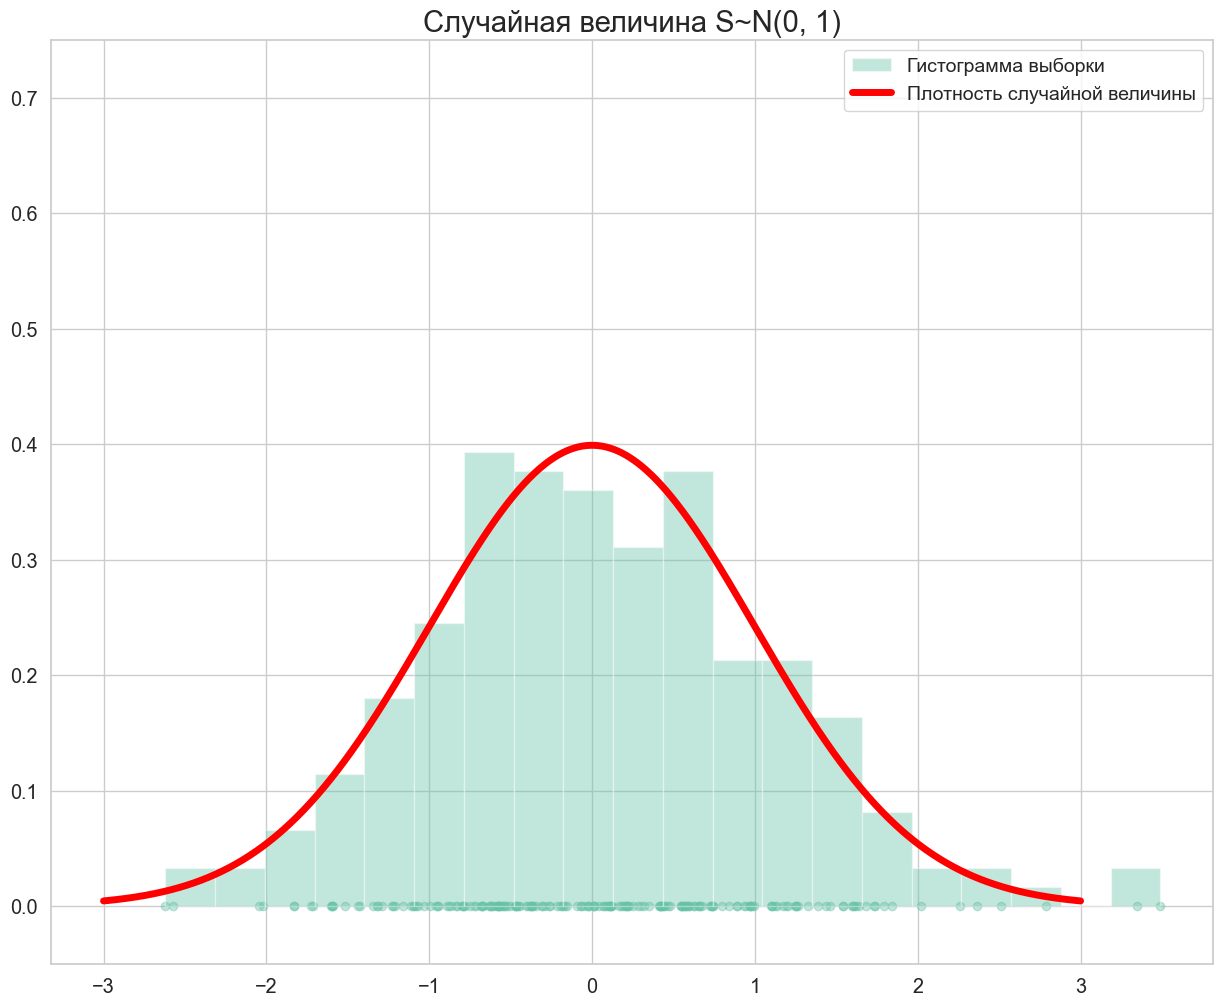

In [134]:
image = plot_normal_density()

Напишем функцию expon генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:
Если $ξ$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(ξ)$ имеет равномерное распределение на $[0,1]$.

In [139]:
def expon(size=1, lambd=1, precision=30):
    return np.log((uniform(size, precision) - 1) * (-1)) / (-lambd)

Визуализируем выборку из 200 случайных величин, которую мы получим при помощи функции выше:

In [156]:
def plot_expon_density(size=100):
    np.seterr(divide = 'ignore')

    random_values = expon(size, 1, 9)
    y_values = np.zeros(size)
    grid = np.linspace(-0.5, 5, 1000)

    plt.figure(figsize=(15, 12))

    plt.scatter(random_values, y_values, alpha=0.4)
    plt.hist(np.ma.masked_invalid(random_values), bins=16, alpha=0.4, density=True, label='Гистограмма выборки')
    plt.plot(grid, expon_pdf(grid), color='red', lw=5, label='Плотность случайной величины')

    plt.title("Случайная величина S~Exp(1)", fontsize=21)
    plt.legend(fontsize=14)
    plt.ylim((-0.05, 1.3))

    return plt.gcf()

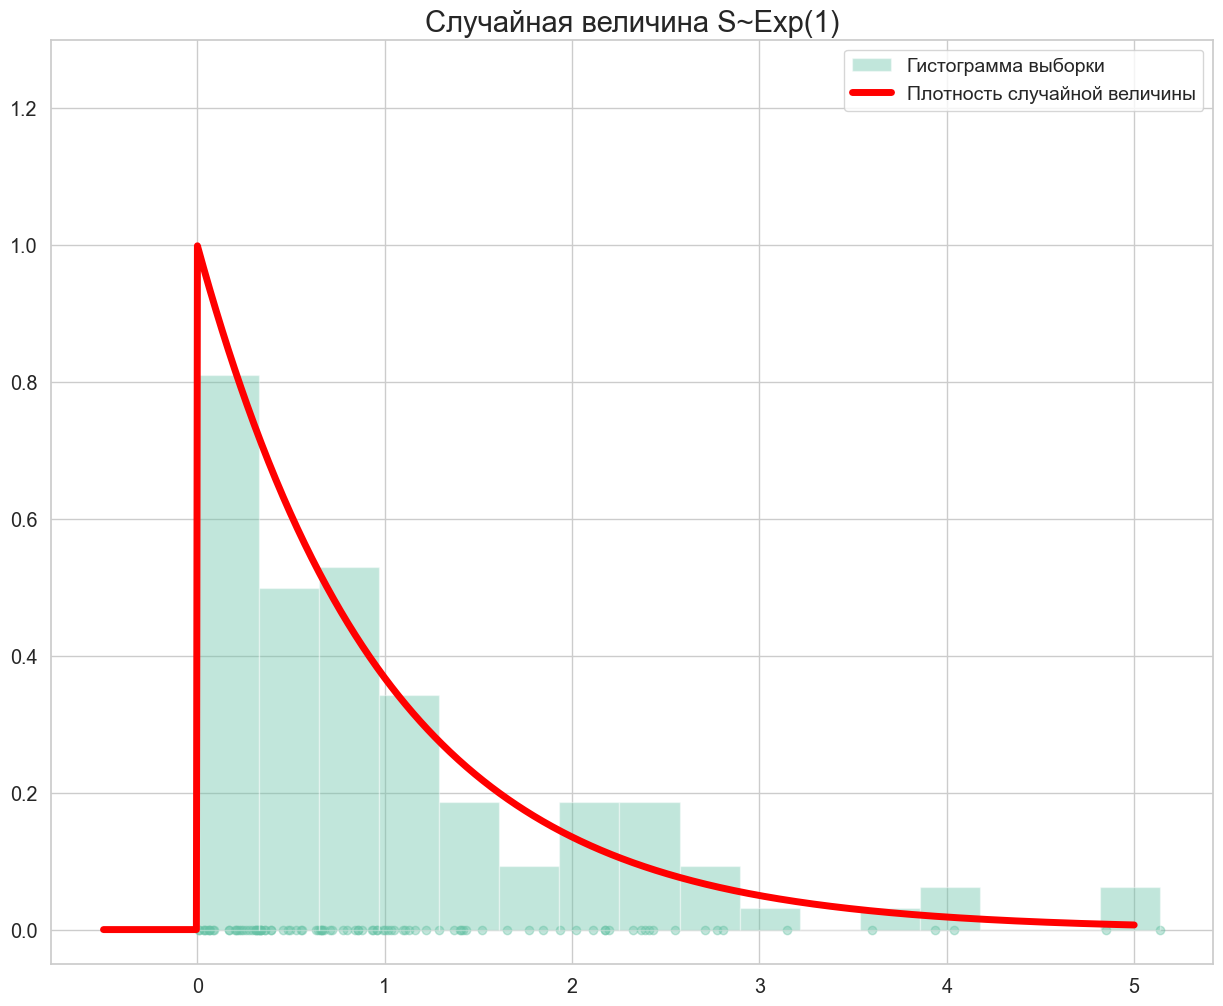

In [158]:
image = plot_expon_density()

**Выводы:**

Я изучил методы по генерации случайных величин из нормального и экспоненциального распределения при помощи равномерного распределения и проверил их корректность, визуализируя полученные с помощью генераторов выборки с помощью гистограм и графиков плотностей распределений.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

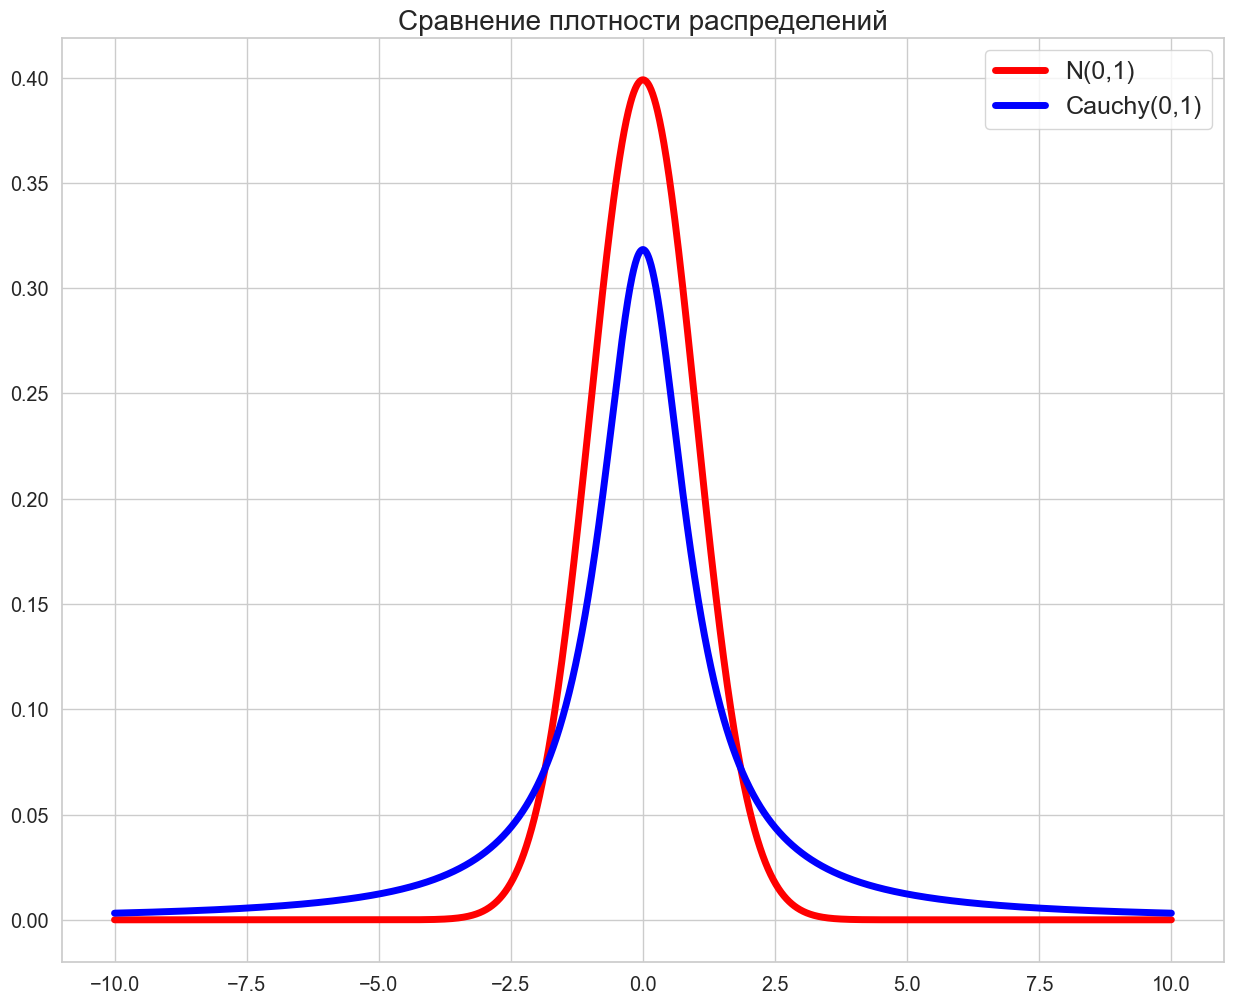

In [51]:
plt.figure(figsize=(15, 12))

grid = np.linspace(-10, 10, 2000)

plt.plot(grid, sps.norm(0, 1).pdf(grid), color='red', lw=5, label="N(0,1)")
plt.plot(grid, sps.cauchy(0, 1).pdf(grid), color='blue', lw=5, label="Cauchy(0,1)")

plt.title("Сравнение плотности распределений", fontsize=20)
plt.legend(fontsize=18)

plt.show()

Графики плотностей нормального распределения и распределения Коши похожи. Как уже отмечалось, действительно плотность нормального распределения убывает быстрее при $x \to \pm\infty$, чем у распределения Коши.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

Для проверки закона больших чисел проведём сначала 10 независимых экспериментов:

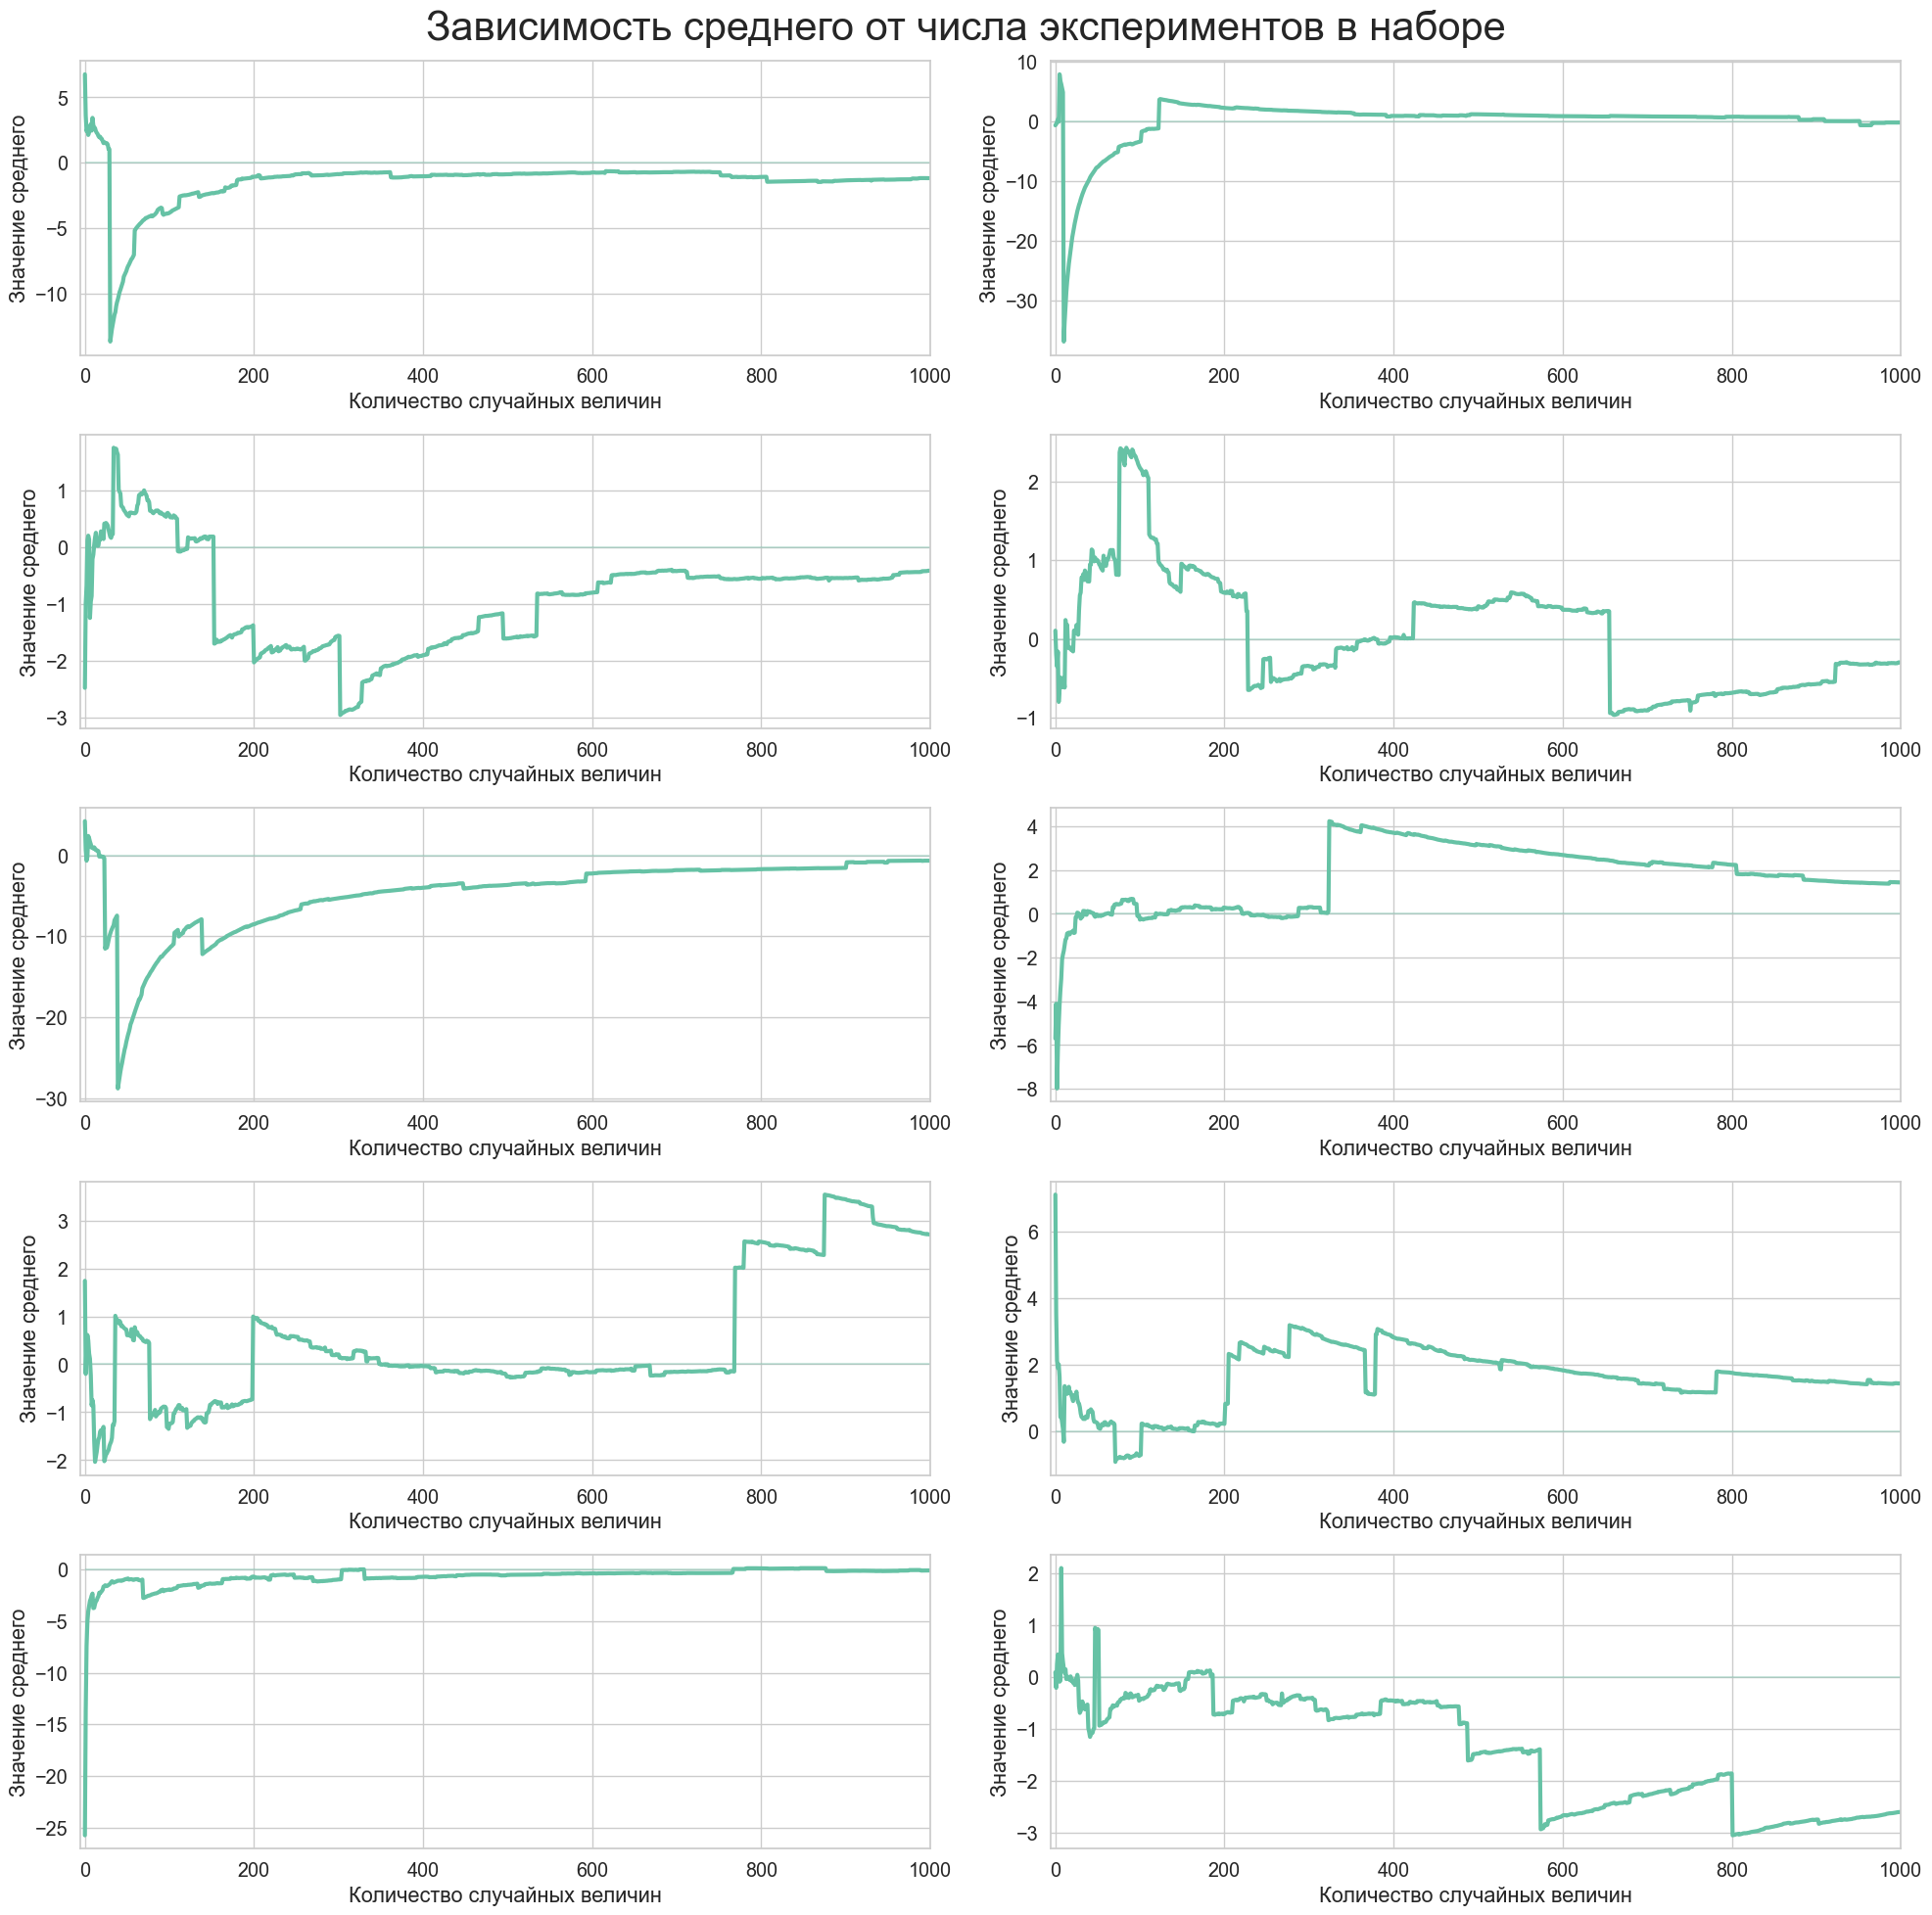

In [195]:
size = 1000  # количество случайных величин

plt.figure(figsize=(20, 20))
plt.suptitle("Зависимость среднего от числа экспериментов в наборе", fontsize=30)

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy(0, 1).rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.tight_layout()

Кажется, что среднее не стремится к какому-то конкретному значению. Давайте посмотрим на большое количество наборов случайных величин:

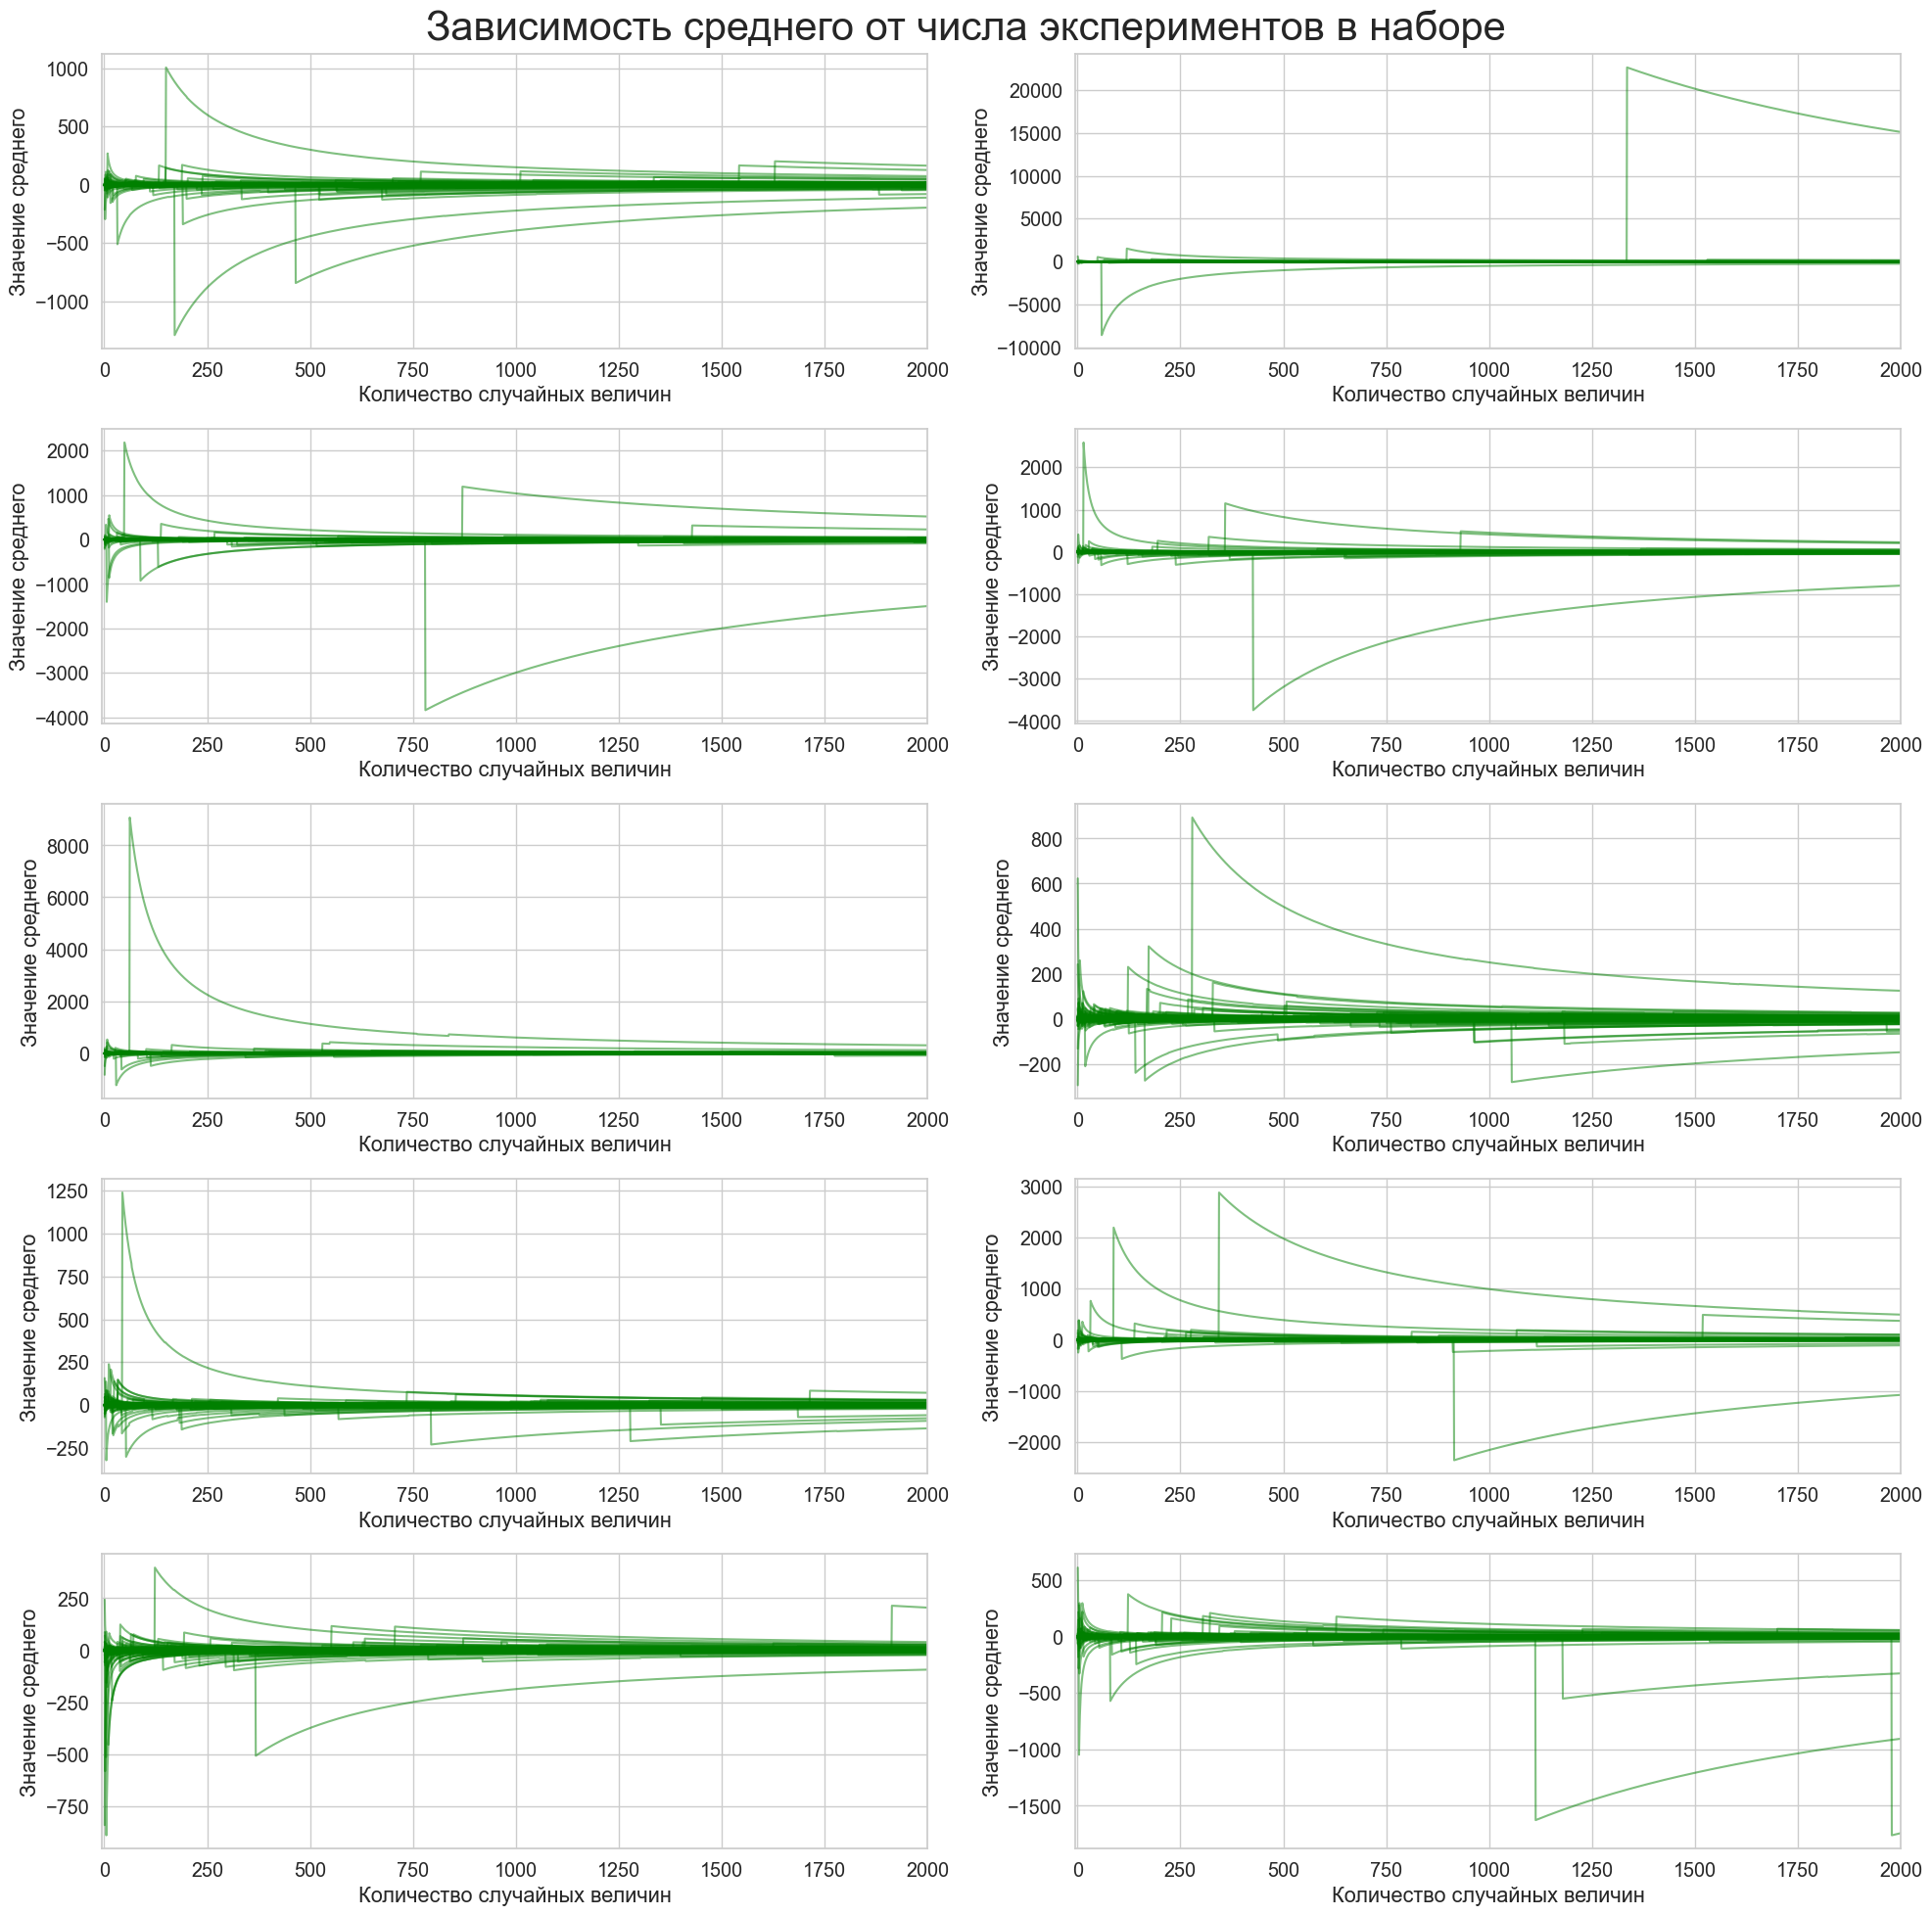

In [196]:
size = 2000  # количество случайных величин
samples_count = 500  # количество выборок

plt.figure(figsize=(20, 20))
plt.suptitle("Зависимость среднего от числа экспериментов в наборе", fontsize=30)

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy(0, 1).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    # График
    plt.subplot(5, 2, i+1)
    for j in range(samples_count):
        plt.plot(np.arange(size) + 1, cum_means[j], color='green', alpha=0.5)  # одним цветом все наборы
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))

plt.tight_layout()

**Вывод:**

Всё-таки, нельзя сказать, что среднее случайных величин по мере увеличения количества стремится к какому-то значению. То есть найдётся $\epsilon$, что для любого $N$ найдётся номер $n$ такой, что среднее будет $>\epsilon$. Вспоминая свойства распределения Коши, мы поймём, почему графики таковы: данное распределение попросту не имеет математического ожидания.

|**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Для 10 наборов по 2000 случайных величин:

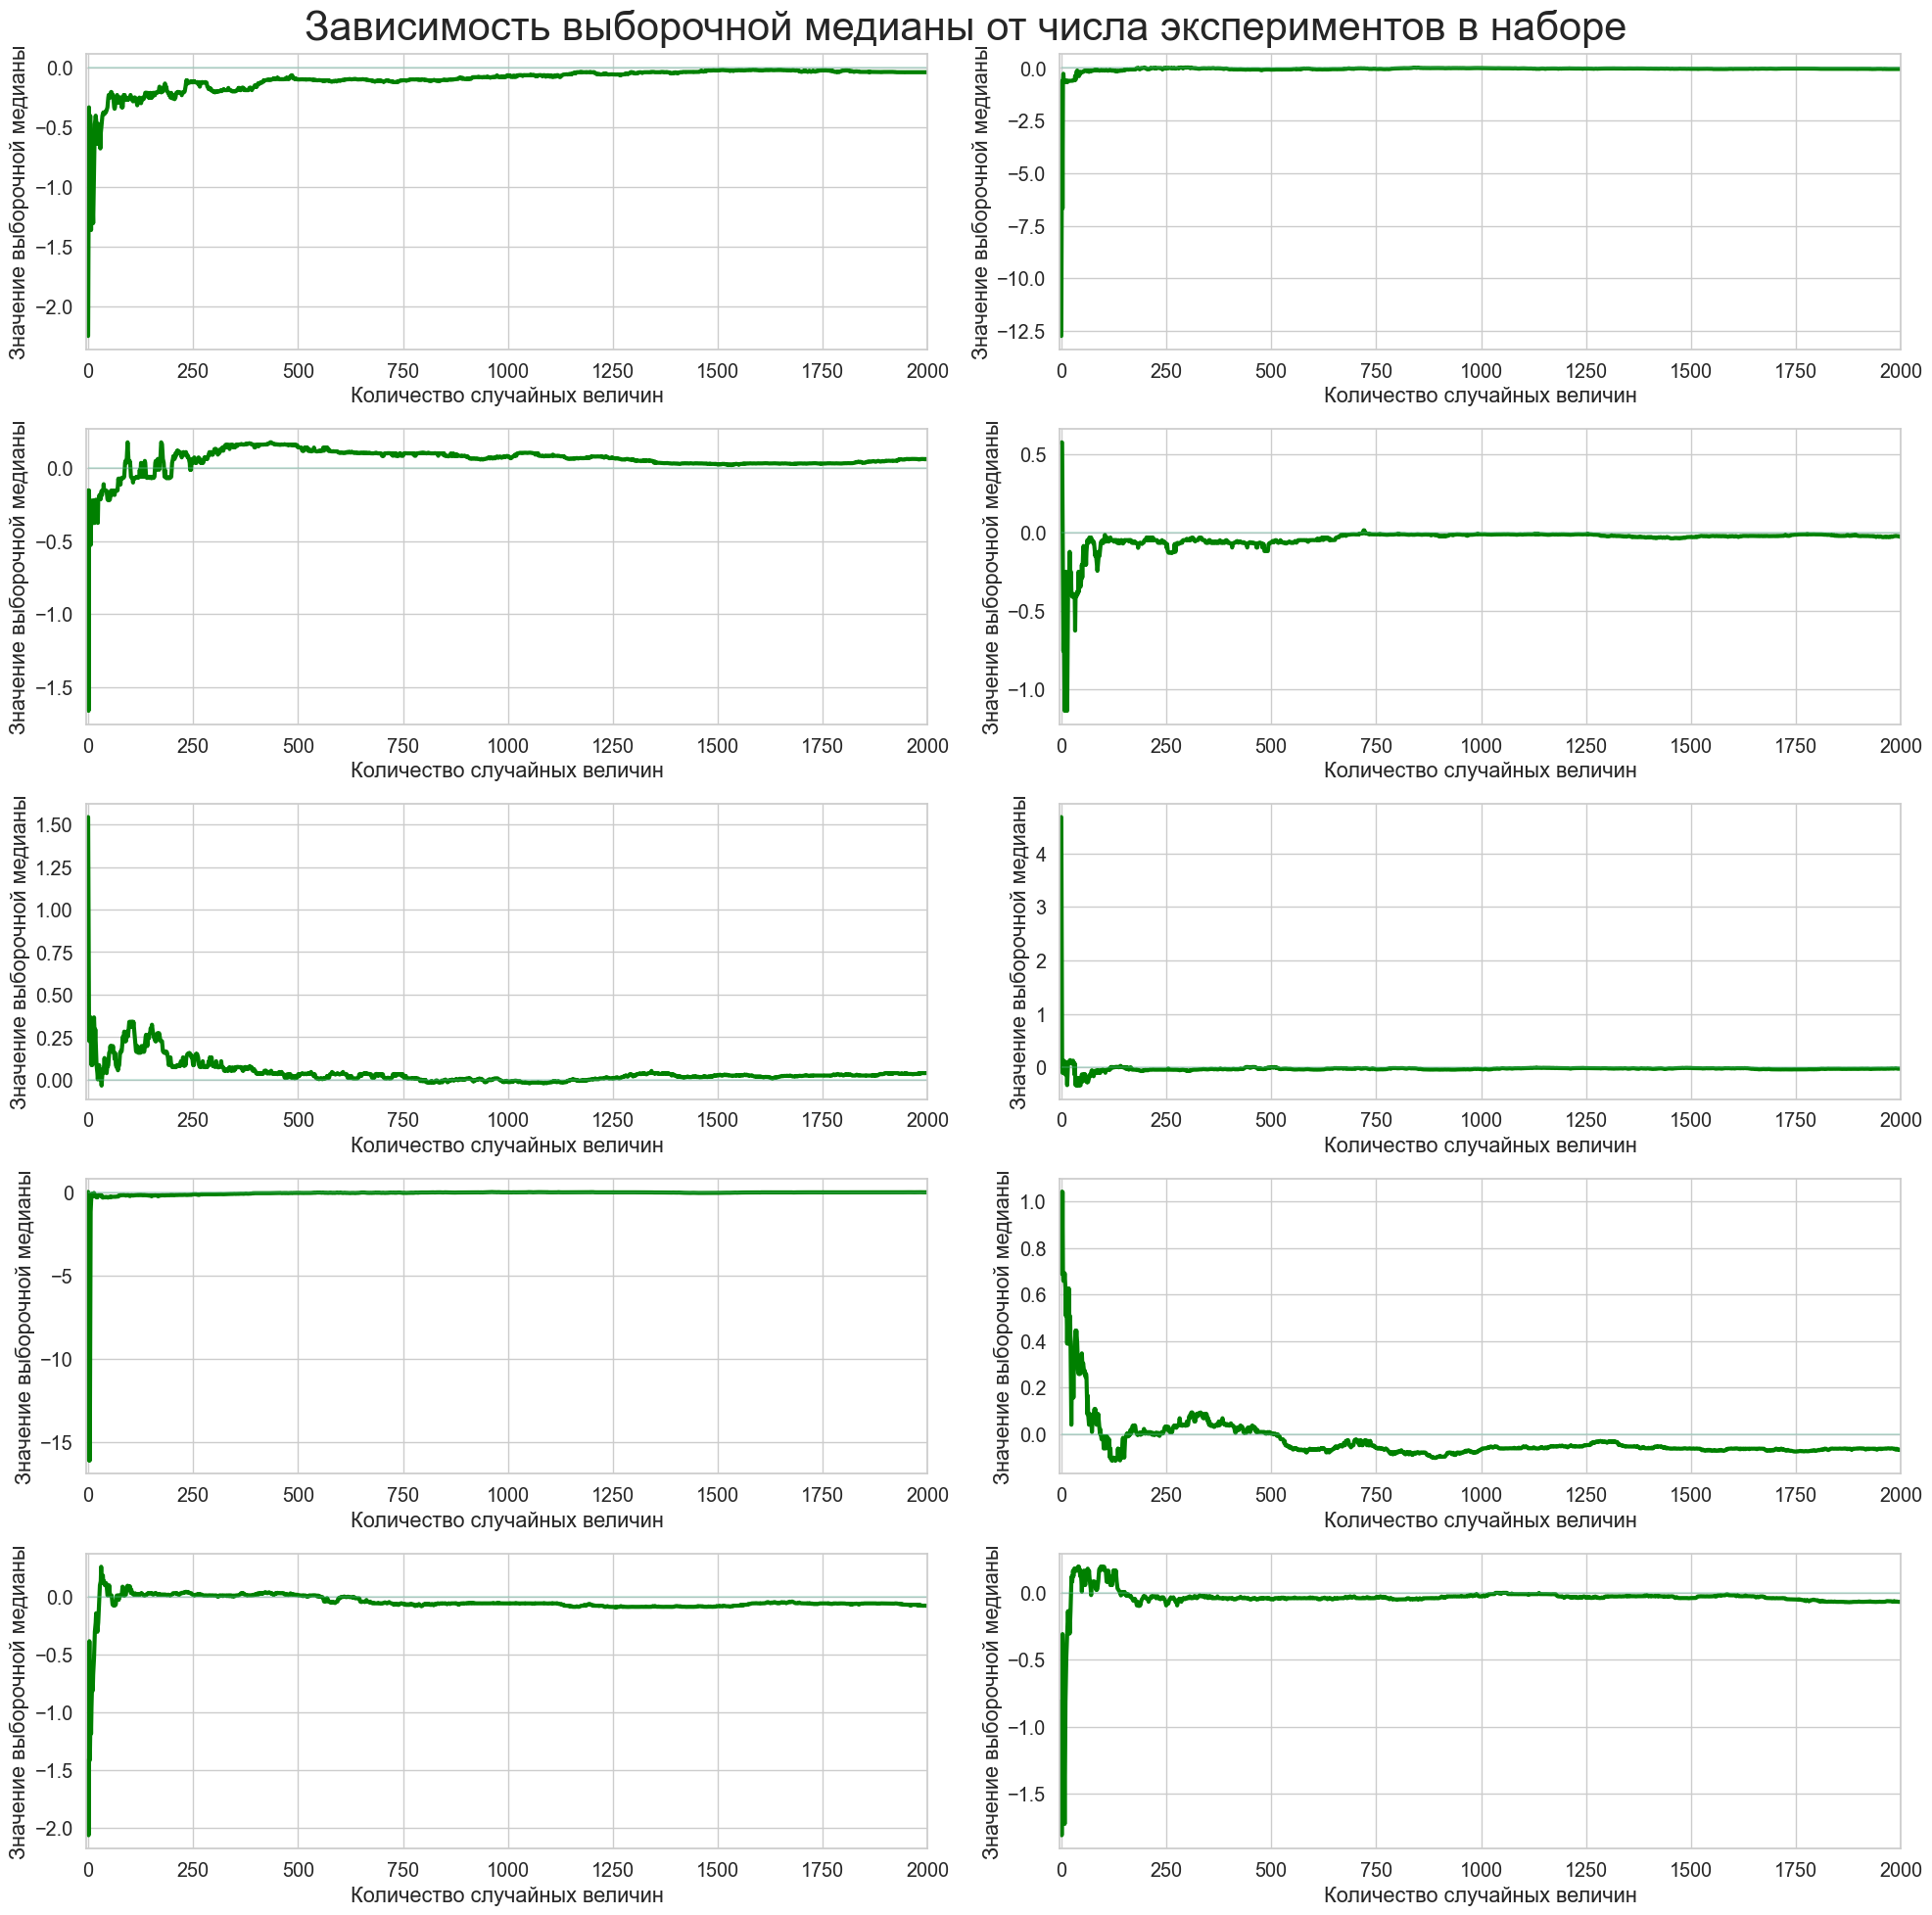

In [197]:
size = 2000  # количество случайных величин

plt.figure(figsize=(20, 20))
plt.suptitle("Зависимость выборочной медианы от числа экспериментов в наборе", fontsize=30)

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление выборочных медиан
    samples = sps.cauchy(0, 1).rvs(size=size)
    medians = np.ndarray(shape=size)
    for j in range(size):
        medians[j] = np.median(samples[0:(j + 1)])

    # График
    plt.subplot(5, 2, i+1)
    plt.plot(medians, lw=3, color='green')
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение выборочной медианы')
    plt.xlim((-5, size))

plt.tight_layout()

И для 500 наборов по 2000 случайных величин:

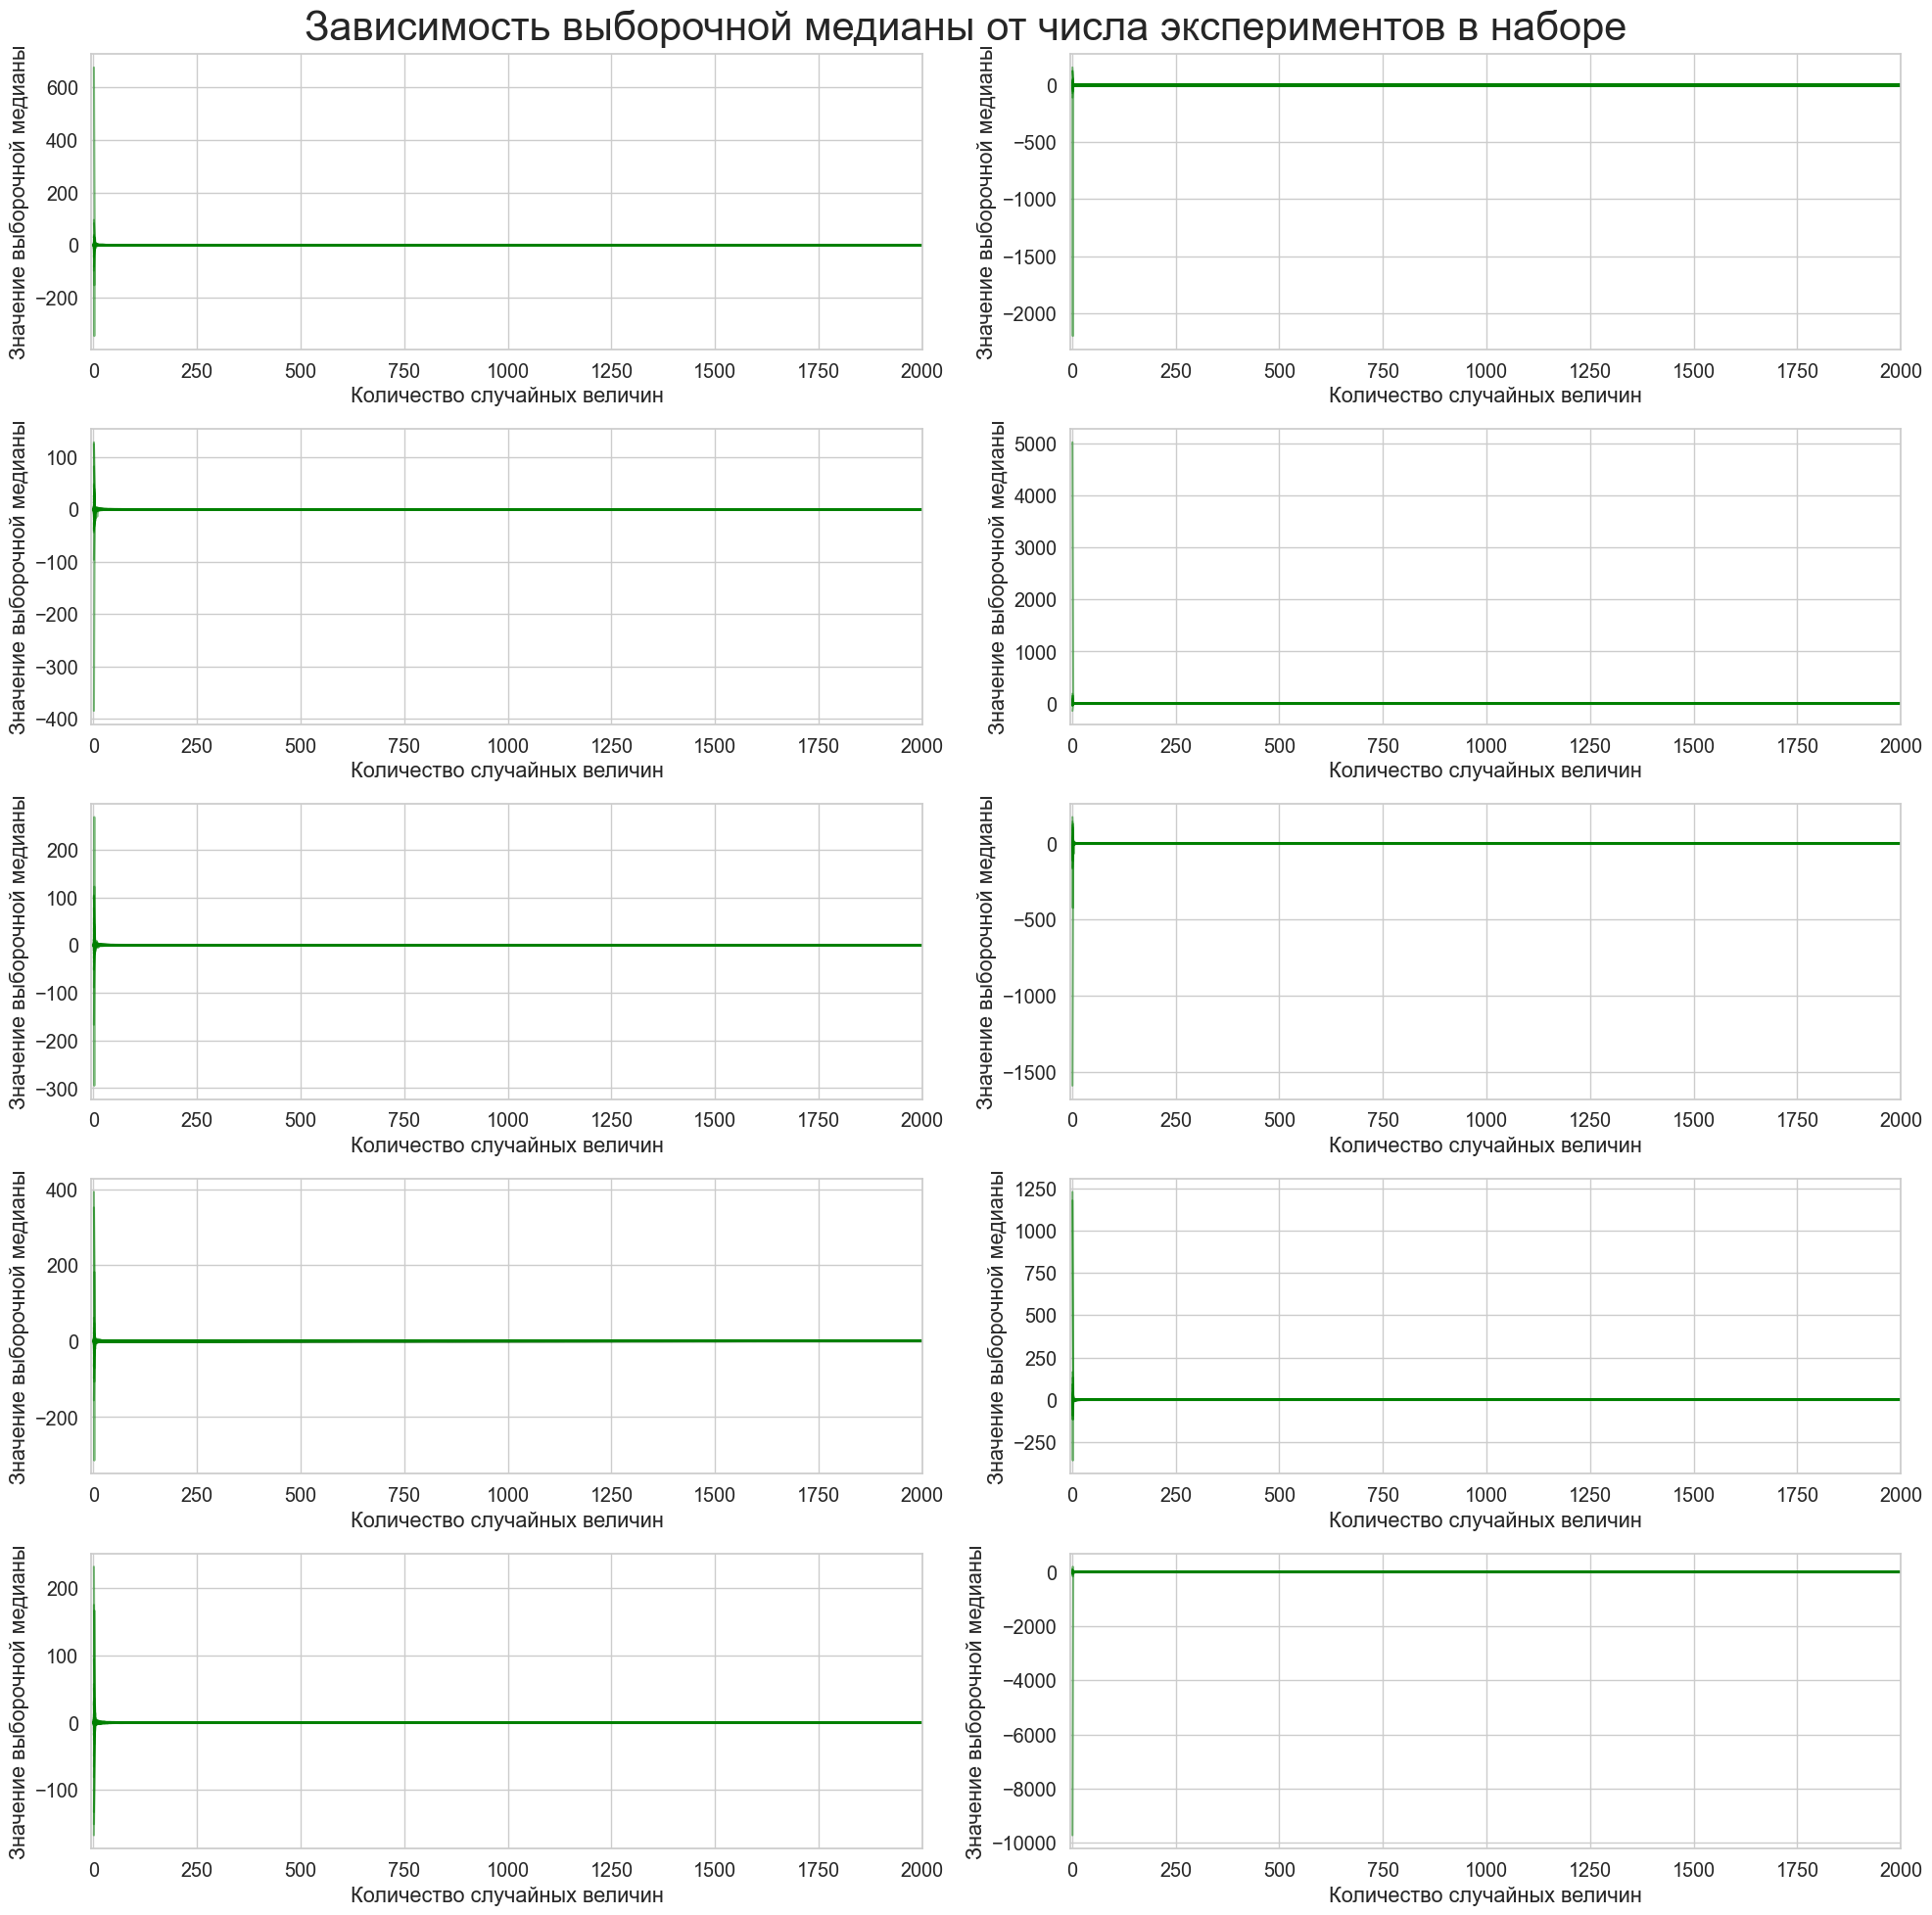

In [198]:
size = 2000  # количество случайных величин
samples_count = 500  # количество выборок

plt.figure(figsize=(20, 20))
plt.suptitle("Зависимость выборочной медианы от числа экспериментов в наборе", fontsize=30)

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление выборочных медиан
    samples = sps.cauchy(0, 1).rvs(size=(samples_count, size))
    medians = np.ndarray(shape=(samples_count, size))
    for j in range(samples_count):
        for k in range(size):
            medians[j, k] = np.median(samples[j, 0:(k + 1)])

    # График
    plt.subplot(5, 2, i+1)
    for j in range(samples_count):
        plt.plot(np.arange(size) + 1, medians[j], color='green', alpha=0.5)  # одним цветом все наборы
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение выборочной медианы')
    plt.xlim((-5, size))

plt.tight_layout()

**Вывод:**

С выборочной медианой проблем не обнаруживается: с ростом размера выборки она устремляется к нулю.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Подключим библиотеку для измерения времени выполнения кода:

In [181]:
import time

Будем попутно выводить промежуточные значения величины $F$, чтобы лучше следить за процессом.

In [184]:
a = 0.5
amount = 500
edge = 0.02
current_f = 1
cur_n = 3

f_values = np.array([])
suitable_n = np.array([])
count = 0

start = 0
end = 0

start = time.time()
while count < 10:
    samples_mean = np.ndarray(shape=amount)

    for k in range(amount):
        samples_mean[k] = np.mean(sps.bernoulli(p=a).rvs(size=cur_n))

    current_f = np.sum(abs(samples_mean - a)) / amount
    print(current_f)

    if current_f <= edge:
        if count == 0:
            end = time.time() - start
        count += 1
        suitable_n = np.concatenate((suitable_n, np.array([cur_n])))
    cur_n += 2
    f_values = np.concatenate((f_values, np.array([current_f])))

0.25666666666666665
0.18320000000000003
0.15
0.1328888888888889
0.1247272727272727
0.12015384615384614
0.1065333333333333
0.10376470588235294
0.09094736842105264
0.08580952380952382
0.0828695652173913
0.08384
0.08051851851851853
0.0750344827586207
0.0692258064516129
0.07042424242424242
0.07097142857142856
0.06540540540540539
0.06487179487179486
0.060243902439024395
0.062325581395348835
0.06057777777777778
0.060170212765957444
0.059142857142857136
0.055607843137254906
0.054981132075471686
0.0554181818181818
0.049052631578947375
0.05054237288135593
0.050360655737704915
0.04961904761904763
0.052707692307692296
0.049791044776119404
0.04907246376811594
0.04738028169014085
0.047013698630137
0.04864
0.045376623376623355
0.046075949367088614
0.045333333333333344
0.04414457831325301
0.041647058823529405
0.041448275862068965
0.04182022471910112
0.03995604395604396
0.04105376344086021
0.03941052631578948
0.04080412371134019
0.03765656565656566
0.03932673267326733
0.038349514563106785
0.0423999999

Время (в секундах), необходимое для поиска минимального необходимого числа экспериментов равно (приблизительно)

In [186]:
end

28.06257200241089

Визуализируем зависимость $F(n)$:

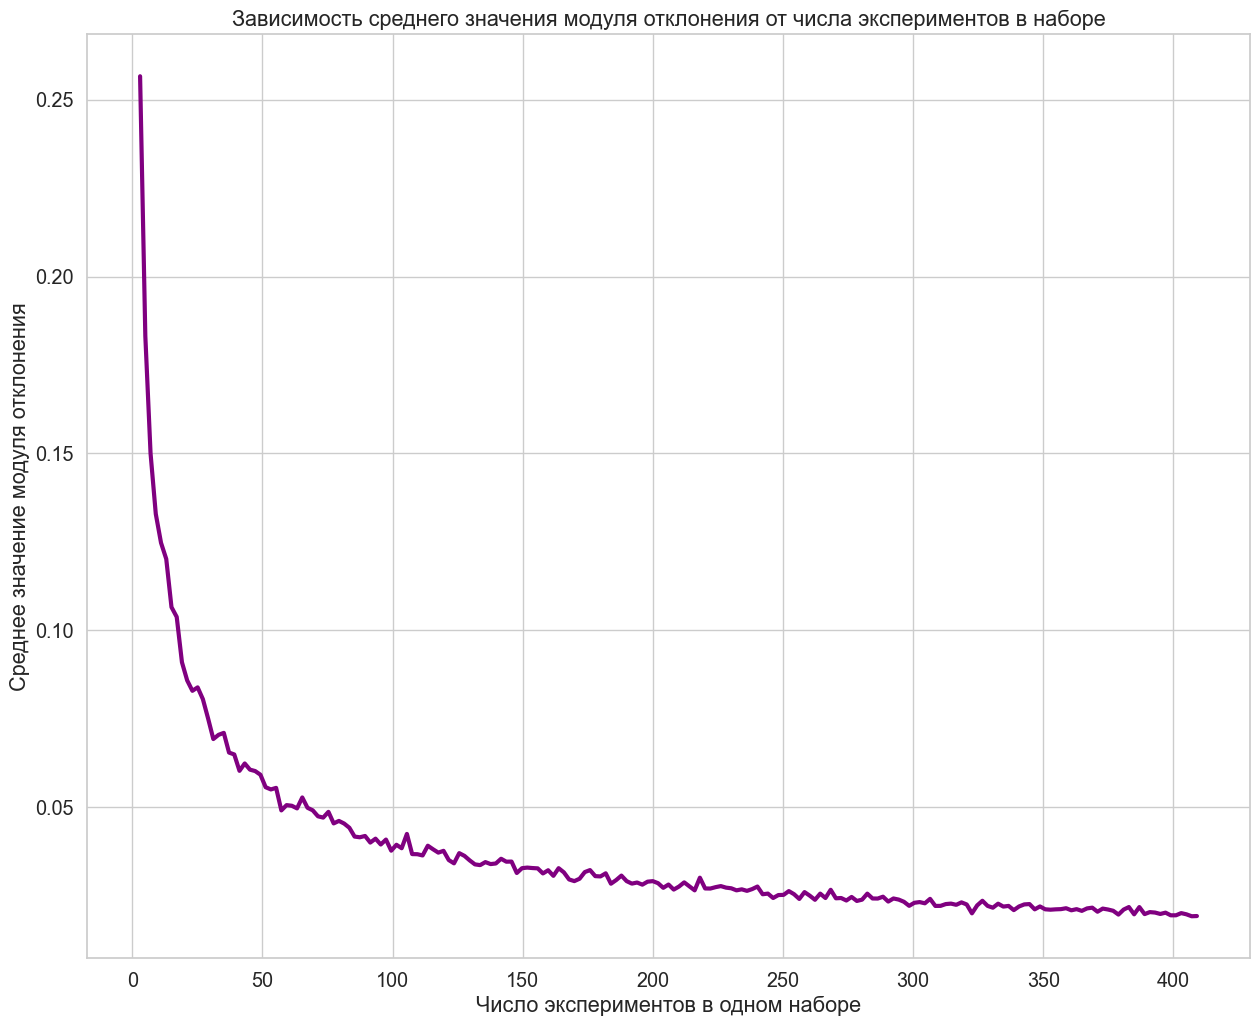

In [187]:
grid = np.linspace(3, cur_n, f_values.size)
plt.figure(figsize=(15, 12))

plt.plot(grid, f_values, color='purple', lw=3)

plt.title("Зависимость среднего значения модуля отклонения от числа экспериментов в наборе")
plt.xlabel("Число экспериментов в одном наборе")
plt.ylabel("Среднее значение модуля отклонения")

plt.show()

А теперь сделаем логарифмический (по основанию 10) масштаб по оси $Y$, чтобы лучше увидеть колебания графика при большом количестве экспериментов:

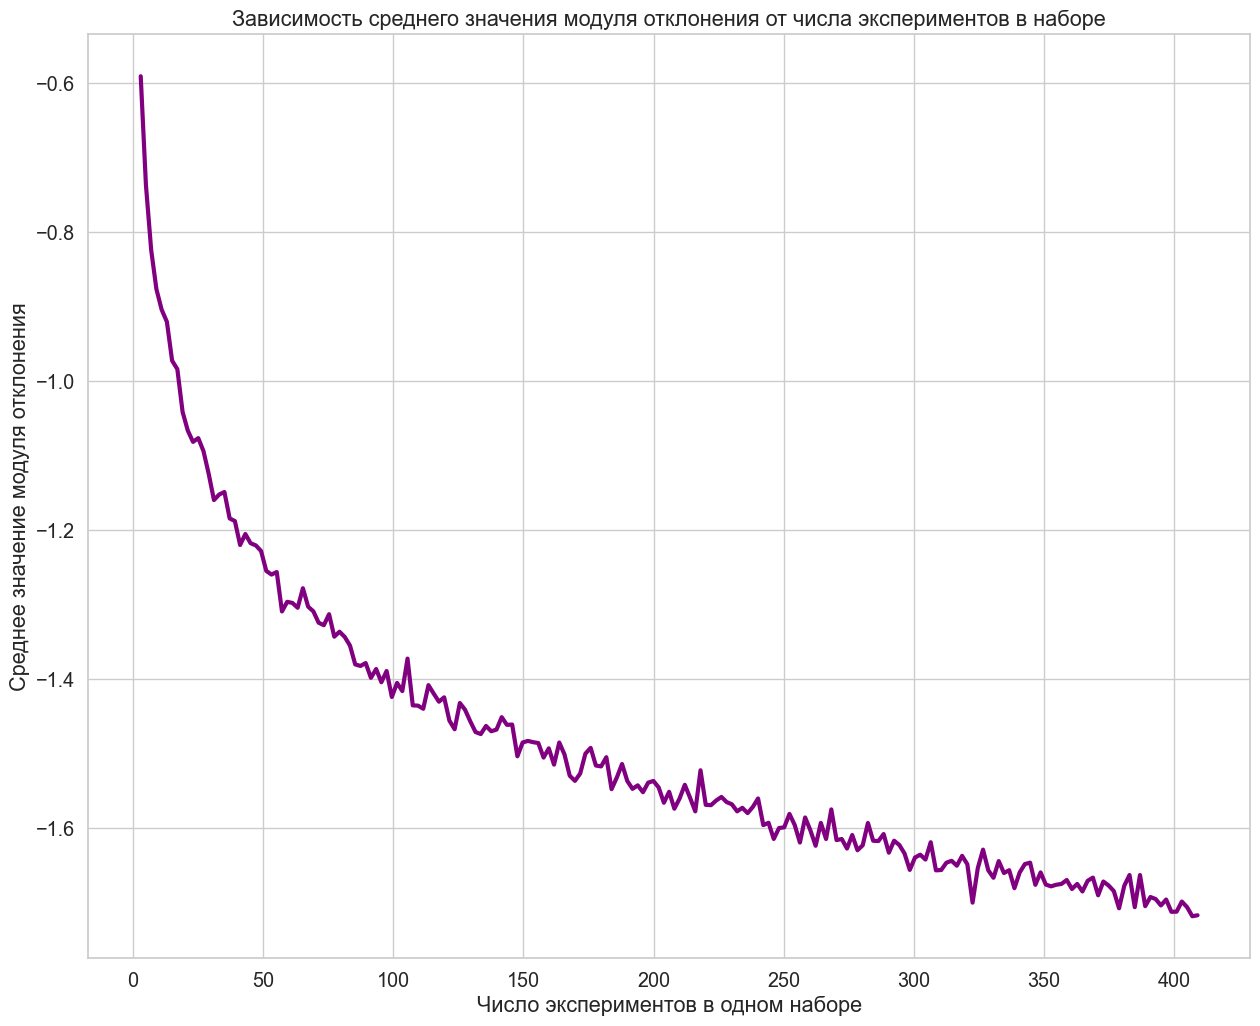

In [188]:
plt.figure(figsize=(15, 12))

plt.plot(grid, np.log10(f_values), color='purple', lw=3)

plt.title("Зависимость среднего значения модуля отклонения от числа экспериментов в наборе")
plt.xlabel("Число экспериментов в одном наборе")
plt.ylabel("Среднее значение модуля отклонения")

plt.show()

Можно заметить, что зависимость похожа на $\frac{1}{x}$

При помощи закона больших чисел продемонстрируем результат:

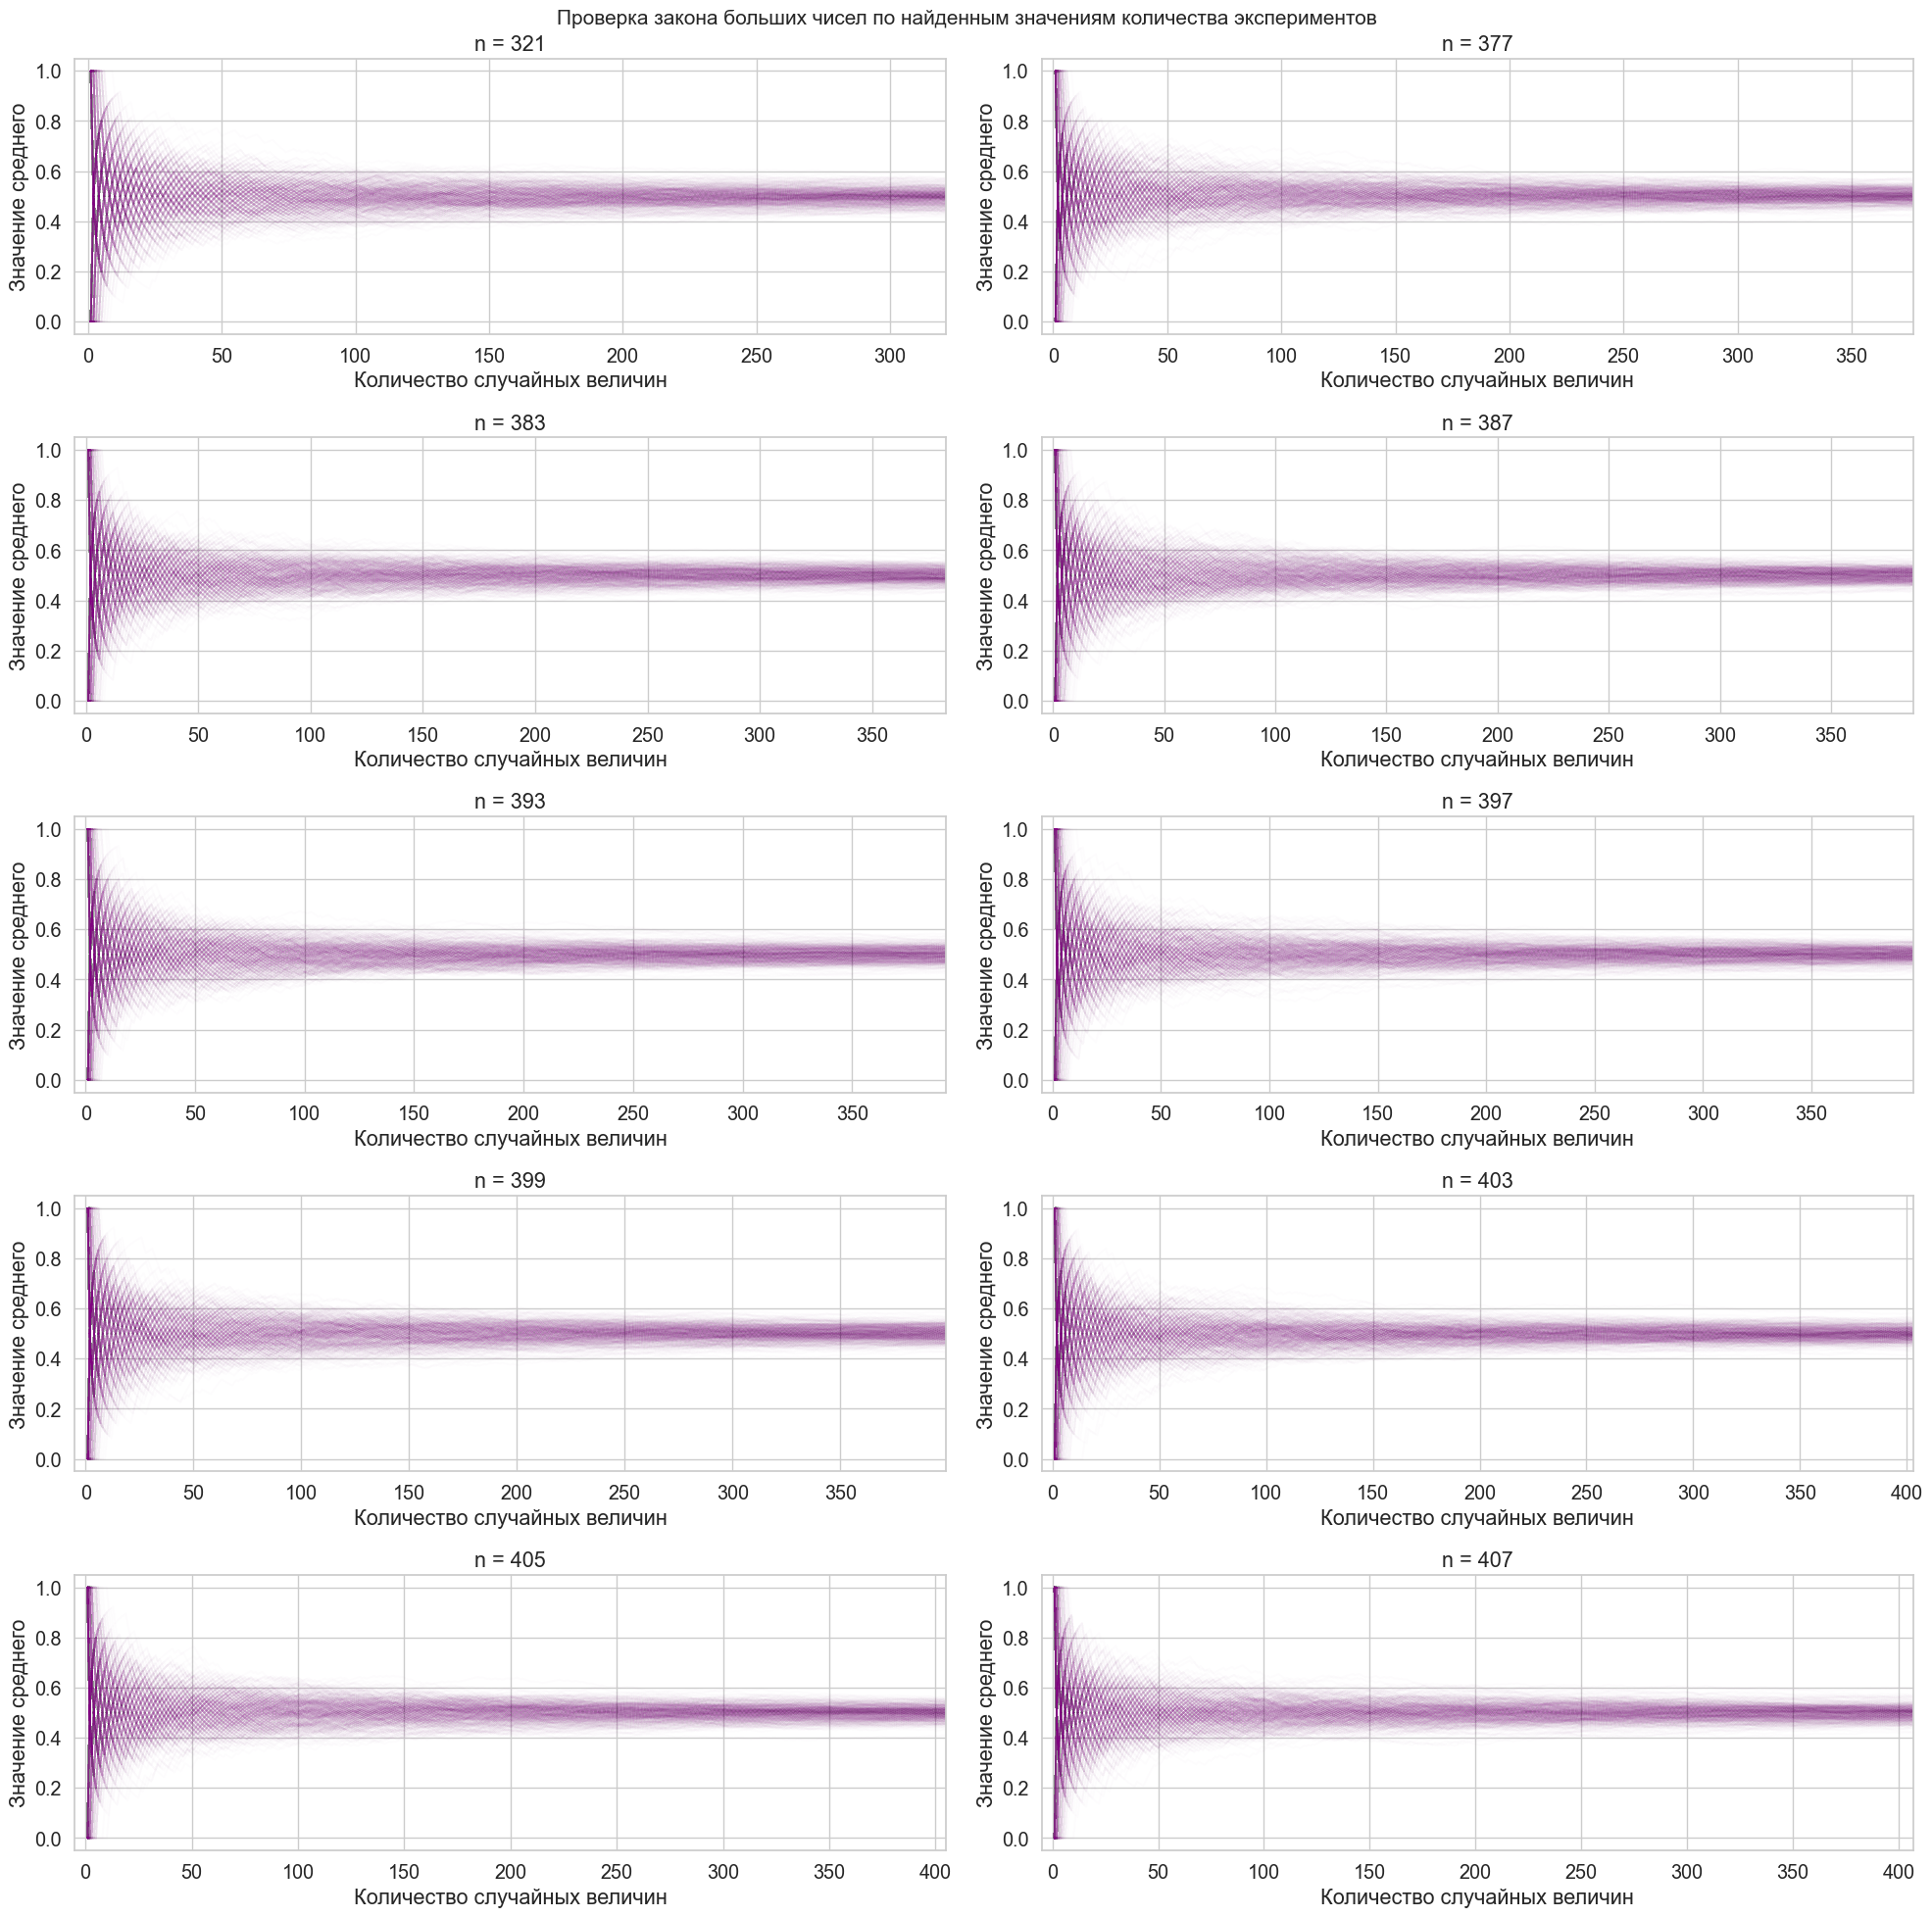

In [189]:
samples_count = 500  # количество выборок

plt.figure(figsize=(20, 20))
plt.suptitle("Проверка закона больших чисел по найденным значениям количества экспериментов", fontsize=15)

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, int(suitable_n[i])))
    cum_means = samples.cumsum(axis=1) / (np.arange(suitable_n[i]) + 1)

    # График
    ax = plt.subplot(5, 2, i + 1)
    ax.title.set_text("n = {val}".format(val=int(suitable_n[i])))
    for j in range(samples_count):
        plt.plot(np.arange(suitable_n[i]) + 1, cum_means[j], color='purple', alpha=0.01)  # одним цветом все наборы
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, suitable_n[i]))

plt.tight_layout()

В принципе, схождения к математическому ожиданию, равному 0.5, не сильно друг от друга отличаются, но видно, что первое значение сильно отличается от следующего за ним (видимо с ним просто повезло), поэтому достаточно будет взять второе значение $n$ из найденных. То есть искомое минимальное $n$ равно

In [192]:
int(suitable_n[1])

377

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [122]:
amount = 500
edge = 0.02

n_values = np.array([])

indices = np.linspace(0.05, 0.95, 19)

for a in indices:
    current_f = 1
    cur_n = 3

    while current_f > edge:
        samples_mean = np.ndarray(shape=amount)

        for k in range(amount):
            samples_mean[k] = np.mean(sps.bernoulli(p=a).rvs(size=cur_n))

        current_f = np.sum(abs(samples_mean - a)) / amount
        cur_n += 2

    print(cur_n - 2)
    n_values = np.concatenate((n_values, np.array([cur_n - 2])))

75
143
183
231
267
295
333
359
355
357
369
341
329
297
279
229
183
147
75


Визуализируем зависимость $n(a)$:

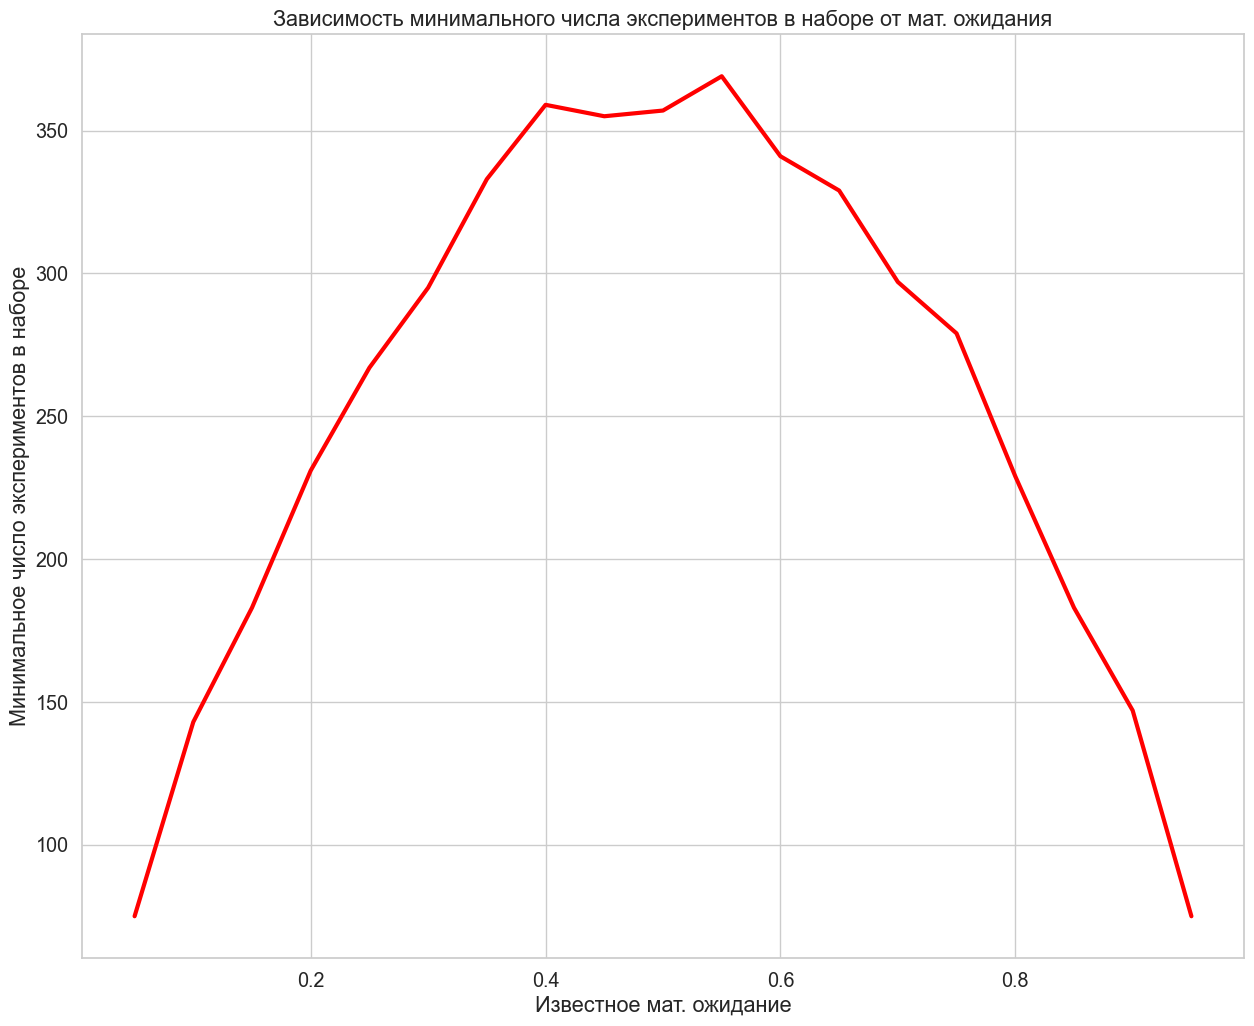

In [191]:
grid = np.linspace(0.05, 0.95, 19)
plt.figure(figsize=(15, 12))

plt.plot(grid, n_values, color='red', lw=3)

plt.title("Зависимость минимального числа экспериментов в наборе от мат. ожидания")
plt.xlabel("Известное мат. ожидание")
plt.ylabel("Минимальное число экспериментов в наборе")

plt.show()

**Выводы:**

Я исследовал вопрос минимального времени, необходимого для достаточно точного установления среднего значения случайной величины Бернулливского распределения. Оно составило около 28-32 секунд, и число экспериментов оказалось в пределах от 355 до 380 (значение может быть разным в зависимости от сгенерированной выборки). Также была проверена корректность полученного результата с помощью визуализации закона больших чисел. И наконец, для каждого параметра мат. ожидания в пределах от 0.05 до 0.95 с шагом 0.05 найдено минимальное необходимое значение числа экспериментов в выборке случайных величин из Бернулливского распределения.

Визуализируя данные на графиках, мы можем сказать, что зависимость точности от минимального числа экспериментов похожа на $\frac{1}{x}$, а зависимость минимального числа экспериментов от известного математического ожидания похожа на квадратичную с максимумом в точке 0.4--0.55 известного мат. ожидания